In [80]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#%load_ext autoreload
#%autoreload 2
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

In [81]:
# list of experiment result files
import os
files = []
for file in os.listdir("output/"):
    if file.endswith('.pkl'):
        files.append('output/' + file)

In [82]:
# read results from files
datasets = {'synthetic_graph_r10.pkl': 'Synthetic R=10', 'synthetic_graph_r100.pkl': 'Synthetic R=100', 'graph_q8107157_n3992.pkl': 'SearchResults'}
algorithms = {'1bandit_sreject': 'Successive Reject', '1bandit_sreject_fast': 'Successive Reject', 
              'hill-climb-restart': 'Explore Descend', 'hill-climb': 'Explore Descend', 
              '1bandit_spectral': 'Spectral Bandit', 'simanneal_1': 'Sim Annealing',
              'simanneal_5': 'Sim Annealing 5', 'simanneal_100': 'Sim Annealing'}
keys = {'1bandit_sreject': 'sr1', '1bandit_sreject_fast': 'sr', 
       'hill-climb-restart': 'hcr', 'hill-climb': 'hc', 
       '1bandit_spectral': 'sb', 'simanneal_1': 'sa1',
        'simanneal_5': 'sa5', 'simanneal_100': 'sa100'}
results = []
for file in files:
    result = pickle.load(open(file, 'rb'))
    args = result['args']
    result['dataset'] = datasets[args.filename]
    result['budget'] = args.budget
    result['key'] = keys[result['algorithm']]
    result['algorithm'] = algorithms[result['algorithm']]
    result['run-time'] = result['run-time'] / args.n_trials
    results.append(result)

results.sort(key=lambda r: (r['dataset'], r['budget'], r['algorithm']))

print('No.\tDataset\t\tBudget\tAlgorithm\t\tTime\tGap2f*\tSTD')
for i, result in enumerate(results):
    print('{:2}\t{:12}\t{}\t{:20}\t{:.2f}\t{:.3f}\t{:.3f}'.format(
        i, result['dataset'], result['budget'], result['algorithm'], result['run-time'], 
        result['subopt-gaps-mean'], result['subopt-gaps-std']
    ))

No.	Dataset		Budget	Algorithm		Time	Gap2f*	STD
 0	SearchResults	500	Explore Descend     	0.02	0.356	0.210
 1	SearchResults	500	Explore Descend     	0.00	0.417	0.213
 2	SearchResults	500	Sim Annealing       	0.00	0.342	0.211
 3	SearchResults	500	Sim Annealing 5     	0.00	0.344	0.213
 4	SearchResults	500	Successive Reject   	0.00	0.523	0.192
 5	SearchResults	1000	Explore Descend     	0.00	0.321	0.214
 6	SearchResults	1000	Sim Annealing       	0.00	0.295	0.205
 7	SearchResults	1000	Sim Annealing 5     	0.00	0.282	0.197
 8	SearchResults	1000	Successive Reject   	0.00	0.526	0.188
 9	SearchResults	2000	Explore Descend     	0.01	0.213	0.162
10	SearchResults	2000	Sim Annealing       	0.00	0.262	0.193
11	SearchResults	2000	Sim Annealing 5     	0.00	0.258	0.189
12	SearchResults	2000	Successive Reject   	0.00	0.534	0.190
13	SearchResults	3000	Explore Descend     	0.01	0.152	0.113
14	SearchResults	3000	Sim Annealing       	0.00	0.244	0.191
15	SearchResults	3000	Sim Annealing 5     	0.00	0.240	0.18

In [83]:
# setup plot params
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['font.size'] = 16

class Colors:
    def __init__(self):
        self.color_id = -1
        # self.colors = ['xb','og','vr','.c','^m','>k']
        self.colors = ['b--','g-','r-.','co-','m-','k-'] 
    def get(self):
        self.color_id += 1
        return self.colors[self.color_id]
    next = property(get)
    
N_TRIALS = 1000

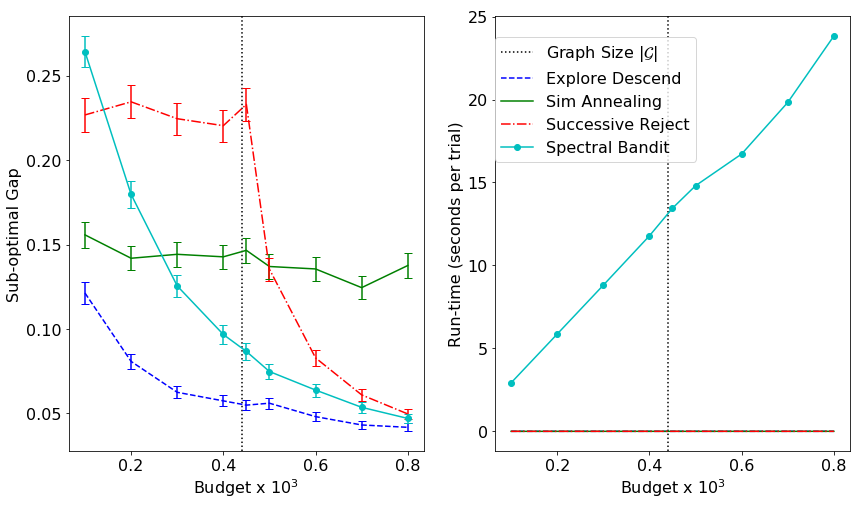

In [90]:
# Plot: Convex R10
ds = 'Synthetic R=10'
alg_keys = ['hc', 'sa1', 'sr', 'sb']
fig, (ax1, ax2) = plt.subplots(1, 2)   
#fig.suptitle('Synthetic Graph R=10')
ax1.set_xlabel('Budget x $10^3$')
ax1.set_ylabel('Sub-optimal Gap')
ax2.set_xlabel('Budget x $10^3$')
ax2.set_ylabel('Run-time (seconds per trial)')

ax1.axvline(x=0.441, linestyle=':', color='k')
ax2.axvline(x=0.441, linestyle=':', color='k', label='Graph Size $|\mathcal{G}|$')

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['subopt-gaps-mean'] for r in results if r['key']==alg and r['dataset']==ds]
    yerr = [1.96*r['subopt-gaps-std']/N_TRIALS**0.5 for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax1.errorbar(xs, ys, yerr=yerr, fmt=clr.get(), capsize=4)

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['run-time'] for r in results if r['key']==alg and r['dataset']==ds]
    labels = [r['algorithm'] for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax2.plot(xs, ys, clr.get(), label=labels[0])

fig.legend(loc=(0.575, 0.68))
plt.savefig('paper/convex_r10.pdf')
plt.savefig('paper/convex_r10.eps')

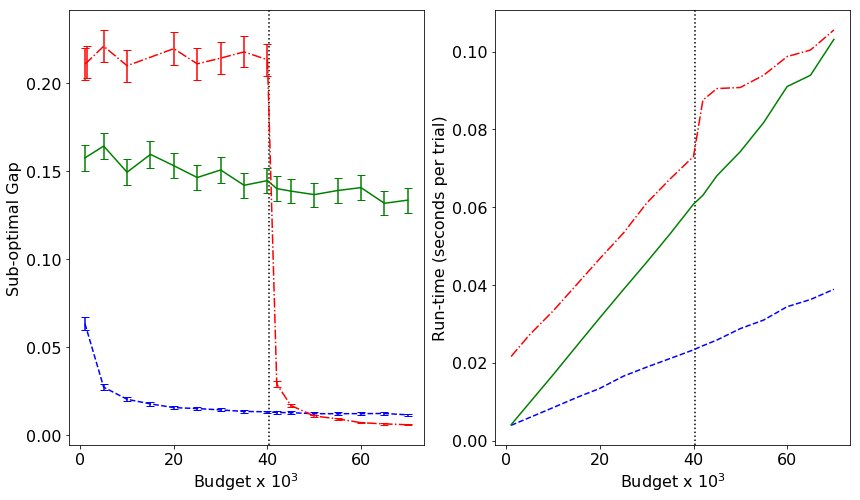

In [88]:
# Plot: Convex R100
ds = 'Synthetic R=100'
alg_keys = ['hc', 'sa1', 'sr']
fig, (ax1, ax2) = plt.subplots(1, 2)   
#fig.suptitle('Synthetic Graph R=100')
ax1.set_xlabel('Budget x $10^3$')
ax1.set_ylabel('Sub-optimal Gap')
ax2.set_xlabel('Budget x $10^3$')
ax2.set_ylabel('Run-time (seconds per trial)')

ax1.axvline(x=40.401, linestyle=':', color='k')
ax2.axvline(x=40.401, linestyle=':', color='k', label='Graph Size $|\mathcal{G}|$')

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['subopt-gaps-mean'] for r in results if r['key']==alg and r['dataset']==ds]
    yerr = [1.96*r['subopt-gaps-std']/N_TRIALS**0.5 for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax1.errorbar(xs, ys, yerr=yerr, fmt=clr.get(), capsize=4)

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['run-time'] for r in results if r['key']==alg and r['dataset']==ds]
    labels = [r['algorithm'] for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax2.plot(xs, ys, clr.get(), label=labels[0])

#fig.legend(loc=(0., 0.1), ncol=1)
plt.savefig('paper/convex_r100.pdf')
plt.savefig('paper/convex_r100.eps')

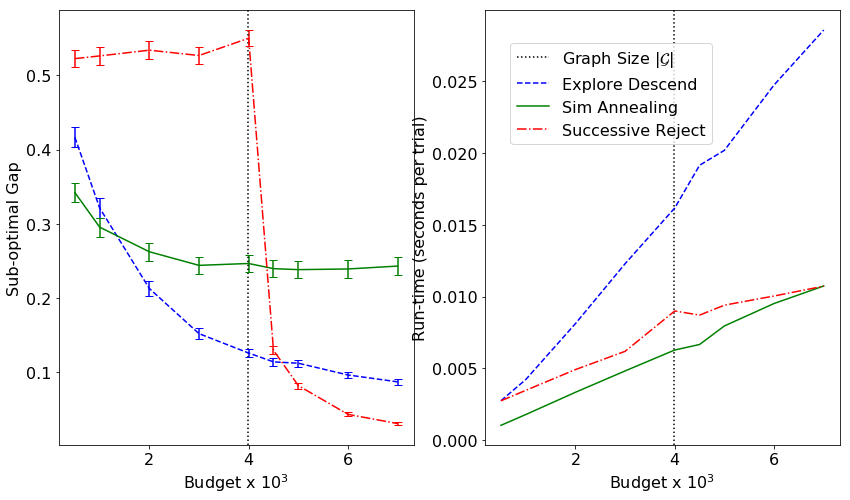

In [86]:
# Plot: AB Test
ds = 'SearchResults'
alg_keys = ['hcr', 'sa1', 'sr']
fig, (ax1, ax2) = plt.subplots(1, 2)   
#fig.suptitle('Web Layout Graph (Real Data)')
ax1.set_xlabel('Budget x $10^3$')
ax1.set_ylabel('Sub-optimal Gap')
ax2.set_xlabel('Budget x $10^3$')
ax2.set_ylabel('Run-time (seconds per trial)')

ax1.axvline(x=3.992, linestyle=':', color='k')
ax2.axvline(x=3.992, linestyle=':', color='k', label='Graph Size $|\mathcal{G}|$')

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['subopt-gaps-mean'] for r in results if r['key']==alg and r['dataset']==ds]
    yerr = [1.96*r['subopt-gaps-std']/N_TRIALS**0.5 for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax1.errorbar(xs, ys, yerr=yerr, fmt=clr.get(), capsize=4)

clr = Colors()
for alg in alg_keys:
    xs = [r['budget']/1000 for r in results if r['key']==alg and r['dataset']==ds]
    ys = [r['run-time'] for r in results if r['key']==alg and r['dataset']==ds]
    labels = [r['algorithm'] for r in results if r['key']==alg and r['dataset']==ds]
    if xs:
        ax2.plot(xs, ys, clr.get(), label=labels[0])

fig.legend(loc=(0.6, 0.71))
plt.savefig('paper/search_results.pdf')
plt.savefig('paper/search_results.eps')